# Illustrasjon av hovedtøynigner i plan tøyningstilstand

Tøynigne $\epsilon_x$, $\epsilon_y$ og $\gamma_{xy}$ på et element i plan tøyningstilstand er i koordinatsystemet x'y' som har en vinkel $\theta$ med koordinatsystemet xy gitt av ligningene:

$$\epsilon_{x'} = \epsilon_x\cos\theta^2+\epsilon_y\sin\theta^2+\gamma_{xy}\cos\theta\sin\theta$$
$$\epsilon_{y'} = \epsilon_x\cos(\theta+\pi/2)^2+\epsilon_y\sin(\theta+\pi/2)^2+\gamma_{xy}\cos(\theta+\pi/2)\sin(\theta+\pi/2)$$ 
$$\gamma_{x'y'} = 2(\epsilon_y-\epsilon_x)\cos\theta\sin\theta+\gamma_{xy}(\cos\theta^2-\sin\theta^2)$$



<function __main__.calc_epsi_xy>

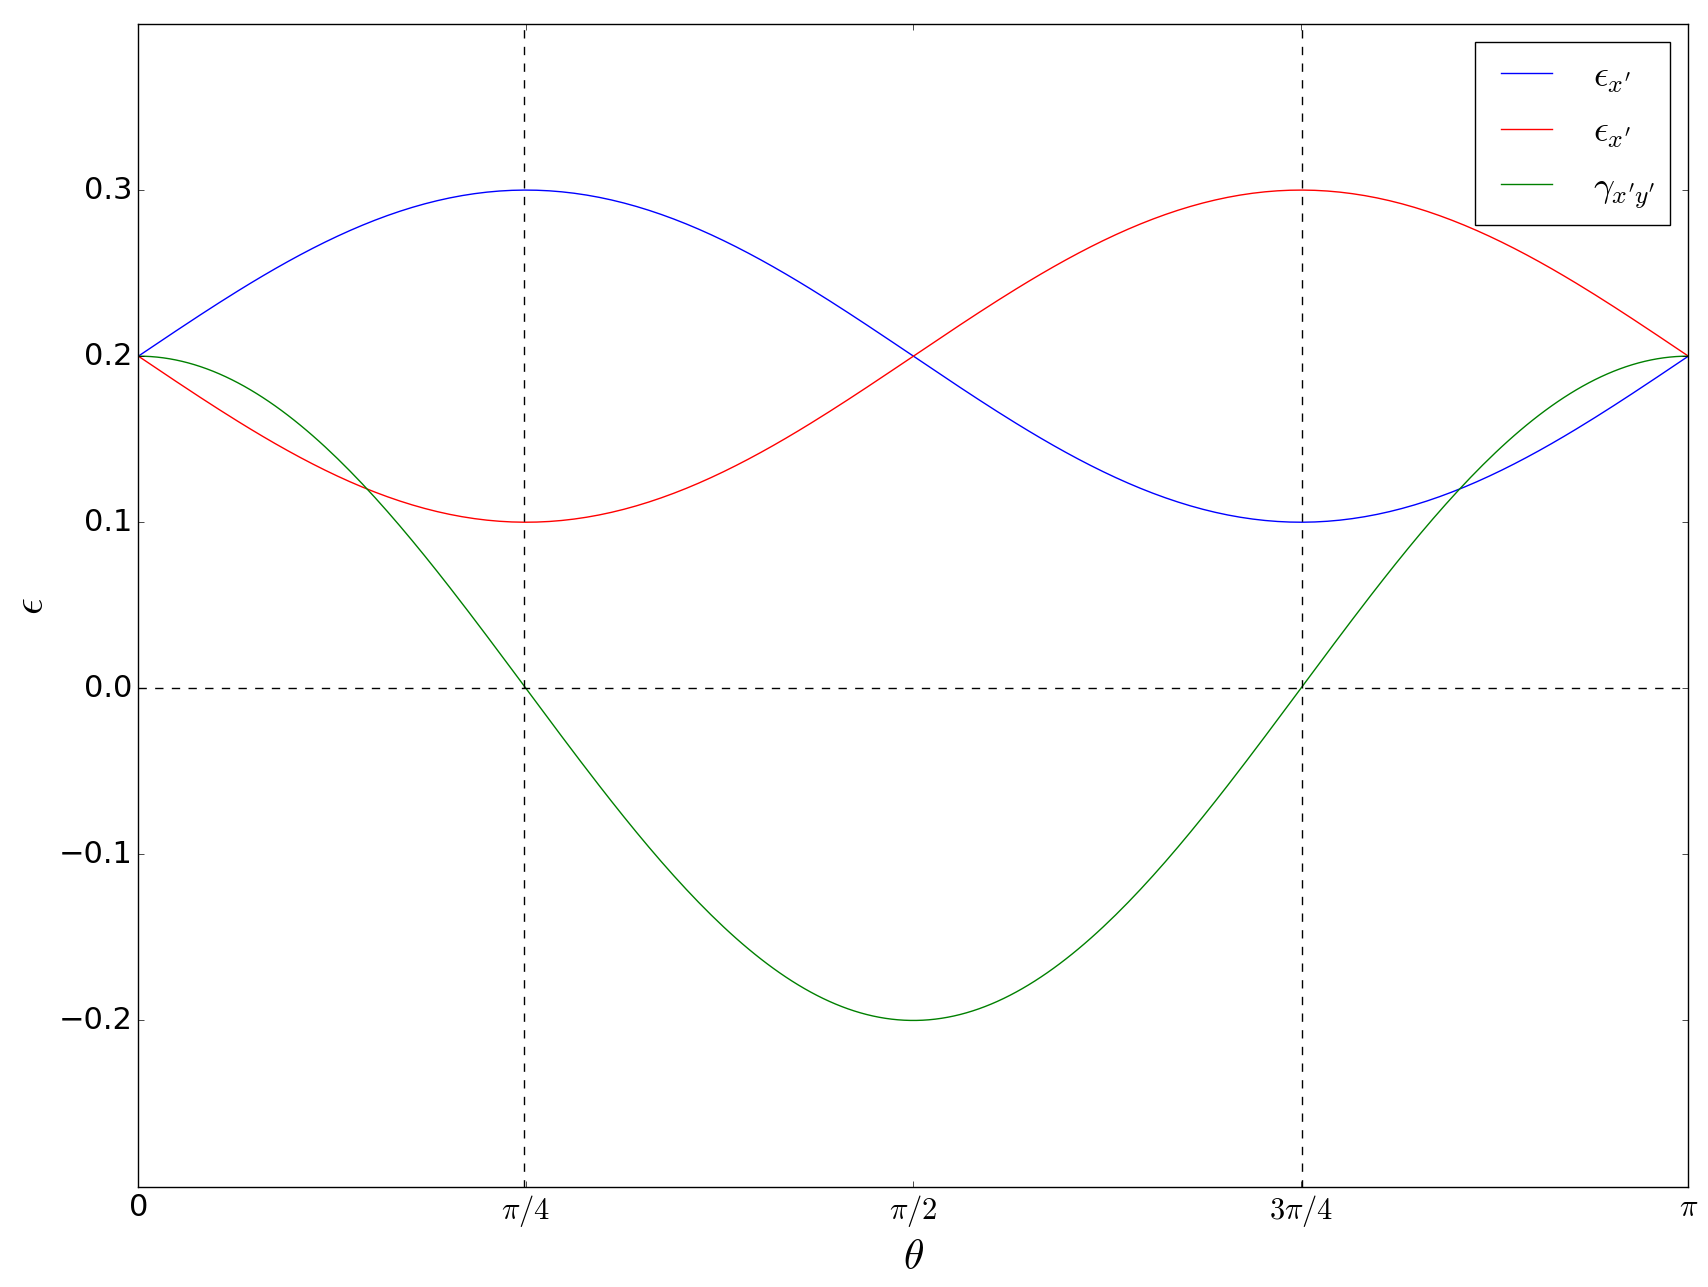

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import *
plt.rcParams.update({'font.size': 22})
epsilon_x = 0.10
epislon_y = 0.05
gamma_xy = 0.10

def calc_epsi_xy(epsilon_x,epsilon_y,gamma_xy):
    # Define vector for angle theta
    theta = np.linspace(0.,np.pi,250)
    
    # Calculate sigma_xt and find maximum point
    epsilon_xt = epsilon_x*(np.cos(theta))**2+epsilon_y*(np.sin(theta))**2+gamma_xy*np.cos(theta)*np.sin(theta)
    max_val = np.amax(epsilon_xt)
    max_index_xt = np.argmax(epsilon_xt) 
    
    epsilon_yt = epsilon_x*(np.cos(theta+np.pi/2))**2+epsilon_y*(np.sin(theta+np.pi/2))**2+gamma_xy*np.cos(theta+np.pi/2)*np.sin(theta+np.pi/2)
    max_index_yt = np.argmax(epsilon_yt) 

    gamma_xyt = 2*(epsilon_y-epsilon_x)*np.cos(theta)*np.sin(theta)+gamma_xy*(np.cos(theta)**2-np.sin(theta)**2)
    min_val = np.amin(gamma_xyt)

    plt.figure(figsize=(20, 15))
    plt.plot(theta, epsilon_xt,'b-')
    plt.plot(theta, epsilon_yt,'r')
    plt.plot(theta, gamma_xyt,'g')
    
    plt.plot([0,np.pi], [0,0], 'k--')
    plt.plot([theta[max_index_xt], theta[max_index_xt]],[min_val-3, max_val+3],'k--')
    plt.plot([theta[max_index_yt], theta[max_index_yt]],[min_val-3, max_val+3],'k--')
    
    plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi ], ['0', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
    plt.xlim(0, np.pi); plt.ylim(min_val-.1, max_val+.1) 
    
    plt.ylabel(r'$\epsilon$', fontsize=30); plt.xlabel(r'$\theta$', fontsize=30)
    plt.legend([r"$\epsilon_{x'}$", r"$\epsilon_{x'}$", r"$\gamma_{x'y'}$"], loc='upper right', frameon='False')

interact(calc_epsi_xy,epsilon_x=(0,0.5,0.05), epsilon_y=(0,0.5,0.05), gamma_xy=(0,0.5,0.05))
